In [15]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
from matplotlib.pyplot import*
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [16]:
# we define the range for the phase difference, such it can take all of the following values:
n = 40
s = [i * 2 * np.pi / n for i in range(n)]
#s

$\textbf{1.- One degree of freedom - Pure state (symmetric BS)}$

In [36]:
# now we construct our quantum circuit for the beam-splitter

qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p0 = []
p1 = []

#we also consider lists for the standard deviations
dp0 = []
dp1 = []

q = QuantumCircuit(1,1)
q.ry(2*np.pi/4,0)
#q.h(0)
q.measure([0],[0])
job = execute([q for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
counts = job.result().get_counts()

temp1 = [] #will store how many 0 values we have for each value of phi
temp2 = [] #will store how many 1 values we have for each value of phi

for i in range(50):
    temp1.append(counts[i].get('0',0)/1000) #stores how many (relative population) 0 values we have (50 times) for each value of phi 
    temp2.append(counts[i].get('1',1)/1000) #stores how many (relative population) 1 values we have (50 times) for each value of phi

p0.append(sum(temp1)/50) # takes the prob of 0 to occur for all the values of phi
p1.append(sum(temp2)/50) # takes the prob of 1 to occur for all the values of phi
dp0.append(np.std(temp1))
dp1.append(np.std(temp2))

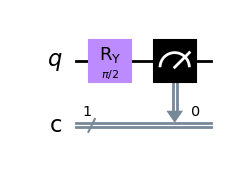

In [37]:
q.draw('mpl')

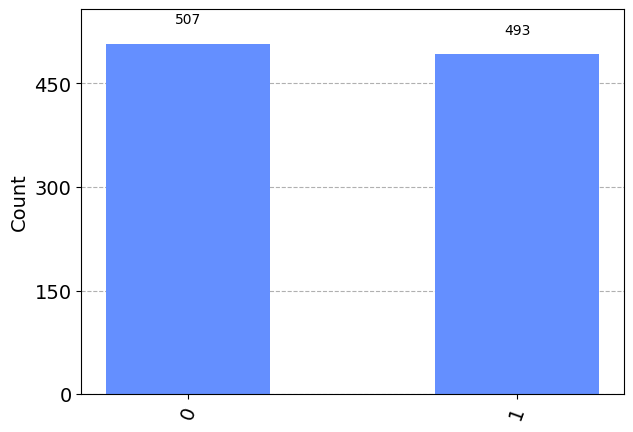

In [38]:
#we can plot an histogram for a value of phi (collected in 'counts') and for one of the 50 executions
plot_histogram(counts[2])

In [39]:
# We compute predictability as
pred1 = np.abs(p0[0]-p1[0])
pred1

0.005239999999999634

In [40]:
# now we construct our quantum circuit for the interferometer with one degree of freedom (the path), and assing to it each value of phi:
qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p0 = []
p1 = []

#we also consider lists for the standard deviations and errors
dp0 = []
dp1 = []

for phi in s:
    q = QuantumCircuit(1,1)
    q.ry(2*np.pi/4,0)
    #q.h(0)
    q.p(phi,0)
    q.ry(2*np.pi/4,0)
    #q.h(0)
    q.measure([0],[0])
    job = execute([q for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 0 values we have for each value of phi
    temp2 = [] #will store how many 1 values we have for each value of phi

    for i in range(50):
        temp1.append(counts[i].get('0',0)/1000) #stores how many (relative population) 0 values we have (50 times) for each value of phi 
        temp2.append(counts[i].get('1',1)/1000) #stores how many (relative population) 1 values we have (50 times) for each value of phi

    p0.append(sum(temp1)/50) # takes the prob of 0 to occur for all the values of phi
    p1.append(sum(temp2)/50) # takes the prob of 1 to occur for all the values of phi
    dp0.append(np.std(temp1))
    dp1.append(np.std(temp2))

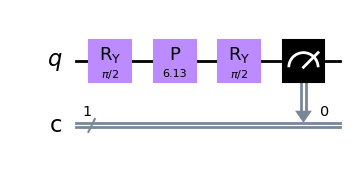

In [41]:
q.draw('mpl')

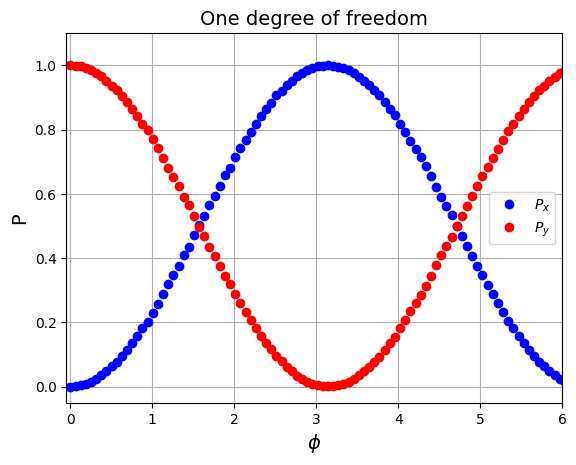

<Figure size 640x480 with 0 Axes>

In [9]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()
#ax.plot(x1, f1(x1),color='green',linestyle='dashed', linewidth=3 ,label="$P_{analytical}=1/2$")
errorbar(s,p0,fmt='b.',capsize=5,label=r"$P_x$",markersize=12)
errorbar(s,p1,fmt='r.',capsize=5,label=r"$P_y$",markersize=12)
ax.set_title('One degree of freedom', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\phi$",size=14)
plt.ylabel("P",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig1.png', dpi=1000)

In [42]:
# We compute visibility as 
v1 = (max(p0) - min(p0))/(max(p0) + min(p0))
v1

1.0

Hence, for this set up (symmetric beam-splitter) visibility is 1 and predic

In [43]:
@np.vectorize
def pred1_analytic(x):
    return 0;
x = s

In [44]:
@np.vectorize
def v1_analytic(x):
    return 1;


In [45]:
v1_list=[]
for i in s:
    v1_list.append(v1)
#v1_list

In [46]:
pred1_list=[]
for i in s:
    pred1_list.append(pred1)
#pred1_list

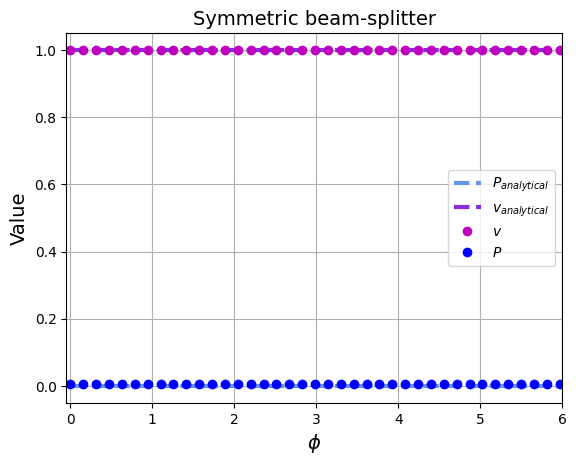

<Figure size 640x480 with 0 Axes>

In [47]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()
ax.plot(x, pred1_analytic(x),color='cornflowerblue',linestyle='dashed', linewidth=3 ,label="$P_{analytical}$")
ax.plot(x, v1_analytic(x),color='blueviolet',linestyle='dashed', linewidth=3 ,label="$v_{analytical}$")
errorbar(s,v1_list,fmt='m.',capsize=5,label=r"$v$",markersize=12)
errorbar(s,pred1_list,fmt='b.',capsize=5,label=r"$P$",markersize=12)
ax.set_title('Symmetric beam-splitter', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\phi$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.05)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig9.png', dpi=1000)

$\textbf{2.- One degree of freedom - Mixed state (symmetric BS)}$

In [16]:
# now we construct our quantum circuit for the beam-splitter

qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p0 = []
p1 = []

#we also consider lists for the standard deviations
dp0 = []
dp1 = []

qr = QuantumRegister(2,)
cr = ClassicalRegister(2)

q = QuantumCircuit(qr,cr)

# we entangle the two qubits to generate a mixed state
q.barrier()
q.h(qr[0])
q.cx(qr[0],qr[1])
q.barrier()

# Then we apply the BS operation
q.ry(2*np.pi/4,qr[0])

# We measure our qubit of interest
q.measure(qr[0],cr[0])
job = execute([q for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
counts = job.result().get_counts()


temp1 = [] #will store how many 0 values we have for each value of phi
temp2 = [] #will store how many 1 values we have for each value of phi

for i in range(50):
    temp1.append(counts[i].get('00',0)/1000) #stores how many (relative population) 0 values we have (50 times) for each value of phi 
    temp2.append(counts[i].get('01',1)/1000) #stores how many (relative population) 1 values we have (50 times) for each value of phi

p0.append(sum(temp1)/50) # takes the prob of 0 to occur for all the values of phi
p1.append(sum(temp2)/50) # takes the prob of 1 to occur for all the values of phi
#dp0.append(np.std(temp1))
#dp1.append(np.std(temp2))

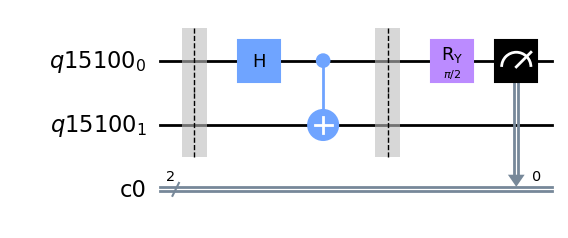

In [17]:
q.draw('mpl')

In [18]:
#plot_histogram(counts)

In [19]:
# We compute predictability as
pred2 = np.abs(p0[0]-p1[0])
pred2

0.00280000000000008

In [20]:
# now we construct our quantum circuit for the interferometer with one degree of freedom (the path):
qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p0 = []
p1 = []

#we also consider lists for the standard deviations and errors
dp0 = []
dp1 = []

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

for phi in s:
    q = QuantumCircuit(qr,cr)

    # we generate our mixed state
    q.barrier()
    q.h(qr[0])
    q.cx(qr[0],qr[1])
    q.barrier()

    # We apply the interferometer
    q.ry(2*np.pi/4,qr[0])
    q.p(phi,qr[0])
    q.ry(2*np.pi/4,qr[0])

    # we measure our qubit of interest
    q.measure(qr[0],cr[0])

    #simulation
    job = execute([q for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 0 values we have for each value of phi
    temp2 = [] #will store how many 1 values we have for each value of phi

    for i in range(50):
        temp1.append(counts[i].get('00',0)/1000) #stores how many (relative population) 0 values we have (50 times) for each value of phi 
        temp2.append(counts[i].get('01',1)/1000) #stores how many (relative population) 1 values we have (50 times) for each value of phi

    p0.append(sum(temp1)/50) # takes the prob of 0 to occur for all the values of phi
    p1.append(sum(temp2)/50) # takes the prob of 1 to occur for all the values of phi
    #dp0.append(np.std(temp1))
    #dp1.append(np.std(temp2))

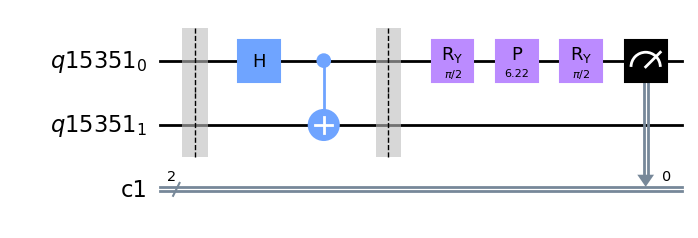

In [21]:
q.draw('mpl')

In [22]:
# We compute visibility as 
v2 = (max(p0) - min(p0))/(max(p0) + min(p0))
v2

0.010286261063710861

$\textbf{3.- One degree of freedom - Pure state (biased BS)}$

In [21]:
# we implement the same situation but for a beam-splitter with different values for reflection and transmission

qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p0 = []
p1 = []

#we also consider lists for the standard deviations and errors
dp0 = []
dp1 = []

q_c = QuantumRegister(1,'q_{c}')
cr = ClassicalRegister(1,'c')

#for theta1 in tqdm(s):
for theta1 in s:
    q = QuantumCircuit(q_c,cr)
    q.ry(2*theta1,0)
    #q.x(0)
    q.measure(q_c[0],cr[0])
    job = execute(q,qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()
    
    temp1 = [] #will store how many 0 values we have for each value of phi
    temp2 = [] #will store how many 1 values we have for each value of phi
    
        #for i in range(50):
    temp1.append(counts.get('0',0)/1000) #stores how many (relative population) 0 values we have (50 times) for each value of phi 
    temp2.append(counts.get('1',1)/1000) #stores how many (relative population) 1 values we have (50 times) for each value of phi
    
    p0.append(sum(temp1)/1) # takes the prob of 0 to occur for all the values of phi
    p1.append(sum(temp2)/1) # takes the prob of 1 to occur for all the values of phi
    dp0.append(np.std(temp1))
    dp1.append(np.std(temp2))

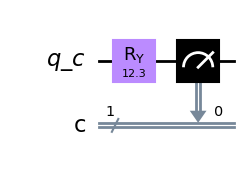

In [22]:
q.draw('mpl')

In [23]:
# We compute predictability as
pred2 = []
for i in range(n):
    pred2.append(np.abs(p0[i]-p1[i]))


In [24]:
#pred2

Now we contruct the whole interferometer to compute visibility

In [25]:
# we implement the same situation but for a beam-splitter with different values for reflection and transmission

qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p0 = []
p1 = []

#we also consider lists for the standard deviations and errors
dp0 = []
dp1 = []

v2 = [] # to store visibility data for different phi values

q_c = QuantumRegister(1,'q_{c}')
cr = ClassicalRegister(1,'c')

for theta1 in s:
    for phi in s:
        q = QuantumCircuit(q_c,cr)
        q.ry(2*theta1,0)
        #q.x(0)
        q.p(phi,0)
        q.ry(2*theta1,0)
        #q.x(0)
        q.measure(q_c[0],cr[0])
        job = execute(q,qasm_simulator,shots = 1000) #implement the simulation
        counts = job.result().get_counts()
            
        temp1 = [] #will store how many 0 values we have for each value of phi
        temp2 = [] #will store how many 1 values we have for each value of phi
            
        #for i in range(50):        
        temp1.append(counts.get('0',0)/1000) #stores how many (relative population) 0 values we have (50 times) for each value of phi 
        temp2.append(counts.get('1',1)/1000) #stores how many (relative population) 1 values we have (50 times) for each value of phi
            
        p0.append(sum(temp1)/1) # takes the prob of 0 to occur for all the values of phi
        p1.append(sum(temp2)/1) # takes the prob of 1 to occur for all the values of phi
        dp0.append(np.std(temp1))
        dp1.append(np.std(temp2))
            
    v2.append((max(p0) - min(p0))/(max(p0) + min(p0)))
    p0.clear()         

In [26]:
#v2

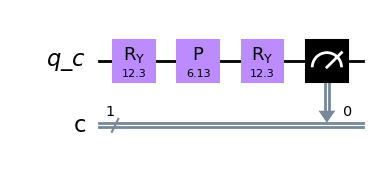

In [27]:
q.draw('mpl')

In [28]:
def fn1(x1):
    return np.abs(np.sin(2*x1));
x1=np.linspace(0,2*np.pi,500)

In [29]:
def fn2(x1):
    return np.abs(np.cos(2*x1));

In [30]:
def fn3(x1):
    return (np.sin(2*x1))**2

In [31]:
def fn4(x1):
    return (2*(np.sin(x1))**2 * (np.cos(x1))**2)/((np.cos(x1))**4 + (np.sin(x1))**4)

In [32]:
def fn5(x1):
    return np.abs((np.cos(x1))**2 - (np.sin(x1))**2)

In [33]:
def fn6(x1):
    return (1-((np.cos(x1))**2 - (np.sin(x1))**2)**2)/(1+((np.cos(x1))**2 - (np.sin(x1))**2)**2)

In [34]:
def fn7(x1):
    return (np.cos(2*x1))**2 + (4*(np.sin(2*x1))**4)/((3+np.cos(4*x1))**2)

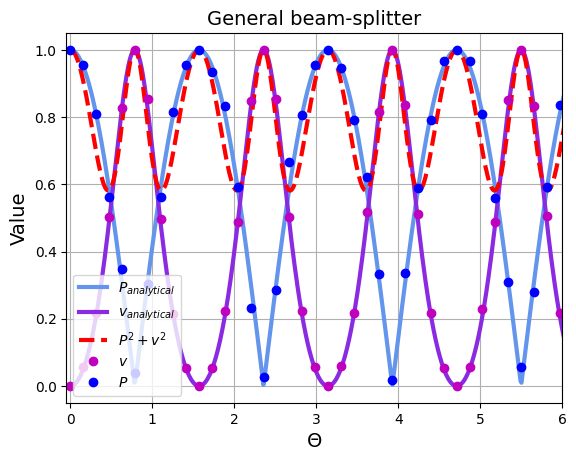

<Figure size 640x480 with 0 Axes>

In [35]:
# We can also visualize visibility and predictability
fig, ax = plt.subplots()
ax.plot(x1, fn2(x1),color='cornflowerblue',linestyle='solid', linewidth=3 ,label="$P_{analytical}$")
#ax.plot(x1, fn3(x1),color='purple',linestyle='solid', linewidth=3 ,label="$v_{analyticalT}$")
ax.plot(x1, fn6(x1),color='blueviolet',linestyle='solid', linewidth=3 ,label="$v_{analytical}$")
ax.plot(x1, fn7(x1),color='red',linestyle='dashed', linewidth=3 ,label="$P^2+v^2$")

errorbar(s,v2,fmt='m.',capsize=5,label=r"$v$",markersize=12)
errorbar(s,pred2,fmt='b.',capsize=5,label=r"$P$",markersize=12)
ax.set_title('General beam-splitter', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.05)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig9.png', dpi=1000)

In [43]:
len(s)

100

In [38]:
len(pred2)

100

In [39]:
(v2[90])**2+(pred2[90])**2

0.771012362362249

In [40]:
sum1=0
for i in range(n):
    sum1+=(v2[i])**2+(pred2[i])**2
    

In [41]:
sum1

80.15363090091257

In [42]:
c = []
for i in range(n):
    c.append((v2[i])**2+(pred2[i])**2)

In [45]:
def fn7(x1):
    return (np.cos(2*x1))**2 + (4*(np.sin(2*x1))**4)/((3+np.cos(4*x1))**2)

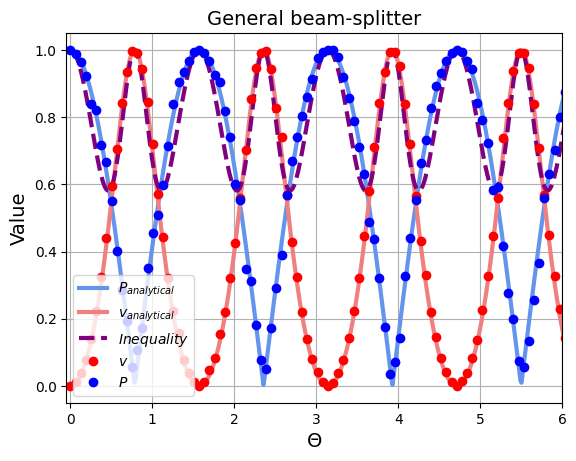

<Figure size 640x480 with 0 Axes>

In [52]:
# We can also visualize visibility and predictability
fig, ax = plt.subplots()
ax.plot(x1, fn2(x1),color='cornflowerblue',linestyle='solid', linewidth=3 ,label="$P_{analytical}$")

ax.plot(x1, fn6(x1),color='lightcoral',linestyle='solid', linewidth=3 ,label="$v_{analytical}$")

ax.plot(x1, fn7(x1),color='purple',linestyle='dashed', linewidth=3 ,label="$Inequality$")

errorbar(s,v2,fmt='r.',capsize=5,label=r"$v$",markersize=12)

errorbar(s,pred2,fmt='b.',capsize=5,label=r"$P$",markersize=12)

#errorbar(s,c,fmt='k.',capsize=5,label=r"$Inequality$",markersize=12)

ax.set_title('General beam-splitter', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.05)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig9.png', dpi=1000)